In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
import seaborn as sns

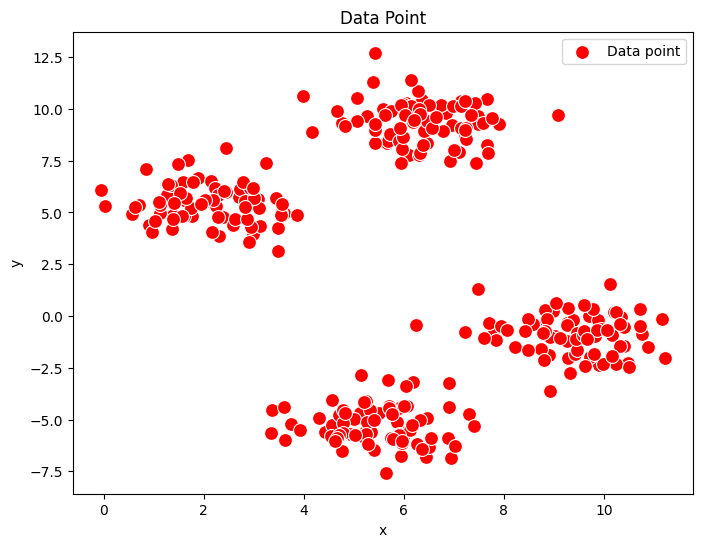

In [132]:
dataSet, _ = make_blobs(n_samples=300, centers=4, n_features=2, random_state=13)
x1 = dataSet[ :, 0]
x2 = dataSet[ :, 1]
plt.figure(figsize=(8,6))
plt.title('Data Point')
plt.xlabel('x')
plt.ylabel('y')
sns.scatterplot(x = x1, 
                y = x2,
                color='red', 
                marker='o',
                s = 100,
                label ='Data point')
plt.show()

In [133]:
def shouldStop(oldCentroids, centroids):
    if oldCentroids is None:
        return False
    return set([tuple(a) for a in oldCentroids]) == set([tuple(a) for a in centroids])

def euclidean_Distance(data_point, centrois):
    return np.sqrt(np.sum((centrois - data_point)**2, axis = 1))

def getLabels(dataSet, centroids):
    Labels = []
    for data in dataSet:
        Distances = [euclidean_Distance(data,centroid.reshape(1,-1)) for centroid in centroids]
        Label = np.argmin(Distances)
        Labels.append(Label)
    return Labels

def getCentroids(dataSet, labels, k):
    centroids = np.zeros((k, len(dataSet[0])))
    for n in range(k):
        centroids[n,:] = dataSet[np.where(labels == n)].mean(axis= 0)
    return centroids
    
def kmeans(dataSet, k):
    numFeatures = len(dataSet[0])
    # centroids = np.random.uniform(np.amin(dataSet , axis= 0), np.amax(dataSet , axis= 0), size=(k, numFeatures))
    centroids = dataSet[np.random.choice(dataSet.shape[0], k, replace=False)]
    oldCentroids = None
    while not shouldStop(oldCentroids, centroids):
        oldCentroids = centroids
        labels = np.array(getLabels(dataSet, centroids))
        centroids = getCentroids(dataSet, labels, k)
    return centroids,labels

Centroids,Labels = kmeans(dataSet, 4)


In [134]:
def cluster_Distance_Deviation(dataSet, centroids, labels):
    mean_Distances = []
    tatol_Deviation = 0
    for i, centroid in enumerate(centroids):
        cluster_points = dataSet[np.where(labels == i)]
        Distance = [euclidean_Distance(centroid, point.reshape(1,-1)) for point in cluster_points]
        mean_Distance = np.sum(Distance) / len(cluster_points)
        mean_Distances.append(mean_Distance)
    for i in range(len(mean_Distances)):
        for j in range(i+1, len(mean_Distances)):
            tatol_Deviation += abs(mean_Distances[i] - mean_Distances[j])
    return tatol_Deviation / len(mean_Distances)

# cluster_Distance_Deviation(dataSet, Centroids, Labels)

0.048293050954919925

In [135]:
test_Centroids = []
test_Labels = []
test_Distance_Deviation = []
for iteration in range(3):
    centroids,labels = kmeans(dataSet,4)
    test_Centroids.append(centroids)
    test_Labels.append(labels)
    Distance_Deviation = cluster_Distance_Deviation(dataSet, centroids, labels)
    print(f'Lần chạy thứ {iteration + 1}: Độ lệch khoảng cách trung bình giữa các cụm = {Distance_Deviation}')
    test_Distance_Deviation.append(Distance_Deviation)


Lần chạy thứ 1: Độ lệch khoảng cách trung bình giữa các cụm = 0.048293050954919925
Lần chạy thứ 2: Độ lệch khoảng cách trung bình giữa các cụm = 1.7788509553886827
Lần chạy thứ 3: Độ lệch khoảng cách trung bình giữa các cụm = 0.048293050954919925


Chọn lần thử thứ 1


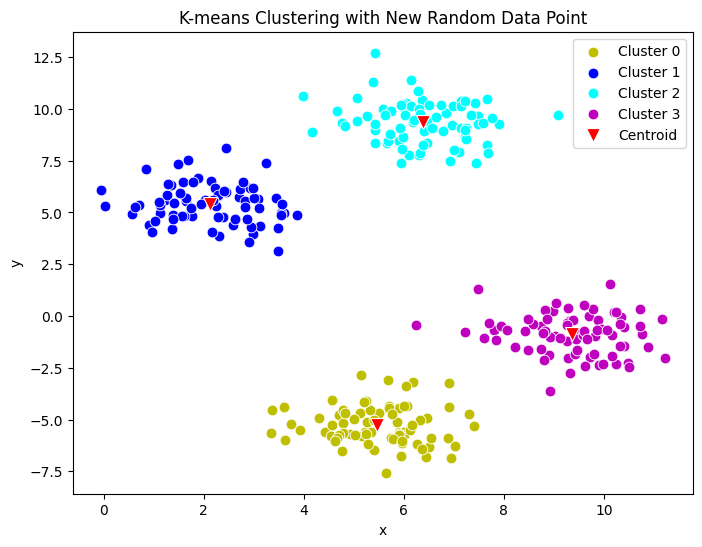

In [136]:
index_min_dis_dav = np.argmin(test_Distance_Deviation)
colors_dict = {0: 'y', 1: 'b', 2: 'cyan', 3: 'm'}
print(f'Chọn lần thử thứ {index_min_dis_dav + 1}')
colors = [colors_dict[i] for i in test_Labels[index_min_dis_dav]]
plt.figure(figsize= (8, 6))
for i, color in enumerate(np.unique(test_Labels[index_min_dis_dav])):
    sns.scatterplot(x = dataSet[test_Labels[index_min_dis_dav] == color][:, 0], 
                y = dataSet[test_Labels[index_min_dis_dav] == color][:, 1], 
                color=colors_dict[color], s= 60 ,
                label=f'Cluster {color}')
sns.scatterplot(x = test_Centroids[index_min_dis_dav][:, 0], 
                y = test_Centroids[index_min_dis_dav][:, 1],
                color='red', marker='v',
                s = 100,
                label ='Centroid')
plt.title('K-means Clustering with New Random Data Point')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.show()


In [137]:
data_point_random = np.random.uniform(np.amin(dataSet , axis= 0), np.amax(dataSet , axis= 0), size= (1,len(dataSet[0])))
predicted_cluter = np.argmin(euclidean_Distance(data_point_random, test_Centroids[index_min_dis_dav]))
print(f'Điểm dữ liệu được tạo : {data_point_random} thuộc cụm {predicted_cluter}')

Điểm dữ liệu được tạo : [[ 2.64637843 -0.81095956]] thuộc cụm 0


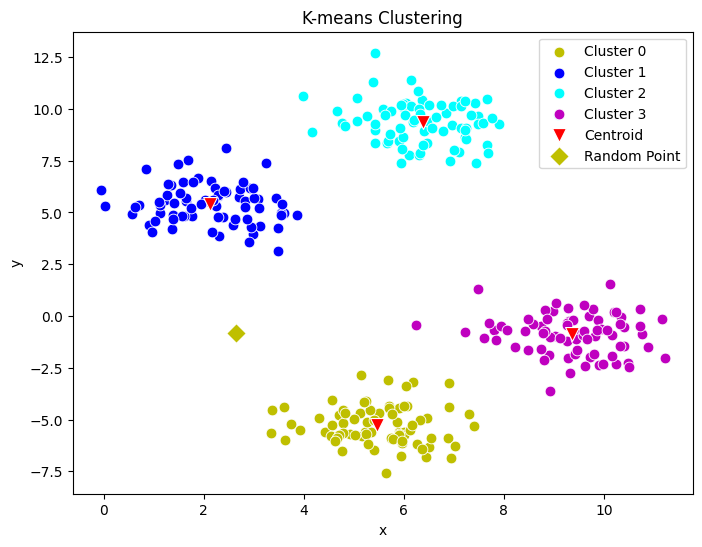

In [138]:
plt.figure(figsize=(8, 6))
for i, color in enumerate(np.unique(test_Labels[index_min_dis_dav])):
    sns.scatterplot(x = dataSet[test_Labels[index_min_dis_dav] == color][:, 0], 
                y = dataSet[test_Labels[index_min_dis_dav] == color][:, 1], 
                color=colors_dict[color], s= 60 ,
                label=f'Cluster {color}')
sns.scatterplot(x = test_Centroids[index_min_dis_dav][:, 0], 
                y = test_Centroids[index_min_dis_dav][:, 1],
                color='red', marker='v',
                s = 100,
                label ='Centroid')
sns.scatterplot(x = [data_point_random[0][0]],
                y = [data_point_random[0][1]],
                color = colors_dict[predicted_cluter],
                marker='D',
                s=100,label='Random Point')
plt.title('K-means Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.show()